In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
df=pd.read_csv('../input/sentiment140/training.1600000.processed.noemoticon.csv',encoding='latin1',header=None)

In [2]:
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [3]:
df.shape

(1600000, 6)

In [4]:
df=df[[5,0]]
df.columns=['tweets','sentiment']

In [5]:
df.head()

,tweets,sentiment
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   tweets     1600000 non-null  object
 1   sentiment  1600000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


In [7]:
df['sentiment'].value_counts()

0    800000
4    800000
Name: sentiment, dtype: int64

In [8]:
sent_map={0:'Negative sentiment',4:'Positive sentiment'}

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Word Counts

In [10]:
x='He is a good boy'
len(x.split())

5

In [11]:
df['tweets'][2]

'@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds'

In [12]:
df['word_counts']=df['tweets'].apply(lambda x: len(str(x).split()) )
df.head()

,tweets,sentiment,word_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19
1,is upset that he can't update his Facebook by ...,0,21
2,@Kenichan I dived many times for the ball. Man...,0,18
3,my whole body feels itchy and like its on fire,0,10
4,"@nationwideclass no, it's not behaving at all....",0,21


# Characters Count

In [13]:
df['tweets'][3]

'my whole body feels itchy and like its on fire '

In [14]:
df['chars_count']=df['tweets'].apply(lambda x: len(x))
df.head()

,tweets,sentiment,word_counts,chars_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115
1,is upset that he can't update his Facebook by ...,0,21,111
2,@Kenichan I dived many times for the ball. Man...,0,18,89
3,my whole body feels itchy and like its on fire,0,10,47
4,"@nationwideclass no, it's not behaving at all....",0,21,111


# Average word Count

In [15]:
def avg_word(x):
    a=len(''.join(x.split()))
    b=len(x.split())
    return a/b

In [16]:
df['avg_word']=df['tweets'].apply(lambda x: avg_word(x))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444
3,my whole body feels itchy and like its on fire,0,10,47,3.700000
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714


# Stop words count

In [17]:
print(STOP_WORDS)

{'of', 'everywhere', 'it', 'between', 'by', 'beside', 'formerly', 'down', 'about', 'which', 'keep', 'must', '‘s', 'does', 'why', 'us', 'an', 'itself', 'yourself', 'never', 'again', 'once', 'latter', 'are', 'their', 'were', 'amongst', 'off', 'show', 'per', 'unless', 'very', 'three', 'who', 'i', 'nor', 'made', 'hereupon', 'bottom', 'above', '’s', 'her', 'should', 'whatever', 'behind', 'his', 'thence', 'well', 'whoever', 'before', 'whose', 'take', 'several', '’re', 'a', 'sometimes', 'many', 'towards', 'now', 'or', 'might', 'everything', 'had', 'somewhere', 'nothing', 'into', 'seemed', 'throughout', 'becoming', 'to', 'next', 're', 'besides', 'did', 'beforehand', 'get', 'what', 'meanwhile', 'empty', 'for', 'when', 'that', 'already', 'nevertheless', 'perhaps', 'somehow', 'make', 'even', 'with', 'least', 'thereafter', 'its', 'whom', 'ourselves', 'ours', 'just', 'in', 'see', 'often', 'therefore', 'all', 'someone', 'how', 'full', 'noone', 'first', 'none', 'thereby', 'namely', 'twenty', 'whereby

In [18]:
df['stop_words_count']=df['tweets'].apply(lambda x: len([t for t in x.split() if t in STOP_WORDS]))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10


# Count #HashTags and @Mentions

In [19]:
df['hash_counts']=df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('#')]))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0


In [20]:
df[df['hash_counts']==1]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts
83,@markhardy1974 Me too #itm,0,4,27,5.750000,1,1
175,@machineplay I'm so sorry you're having to go ...,0,12,80,5.666667,4,1
190,"I activated my Selfcontrol block early, meanin...",0,23,136,4.913043,7,1
331,My man crush Jake Peavy let me down #gayforpeavy,0,9,49,4.444444,2,1
368,Wow. The most depressing thing in the world is...,0,21,111,4.285714,9,1
...,...,...,...,...,...,...,...
1599898,"#haveyouever been alone at night, thought you ...",4,21,122,4.809524,10,1
1599937,"@siahoney I am good thanks! How is #Eric, I...",4,25,138,4.400000,8,1
1599952,#Traveltuesday @GuyNGirlTravels Because their ...,4,12,99,7.250000,3,1
1599988,@Roy_Everitt ha- good job. that's right - we g...,4,22,125,4.681818,5,1


In [21]:
df['mentions_count']=df['tweets'].apply(lambda x: len([t for t in x.split() if t.startswith('@')]))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1


 # If numeric digit present in tweets

In [22]:
df['numeric_count']=df['tweets'].apply(lambda x: len([t for t in x.split() if t.isdigit()]))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0


In [23]:
df['numeric_count'][101]

1

# UPPER case words count

In [24]:
df['upper_count']=df['tweets'].apply(lambda x: len([t for t in x.split() if t.isupper()]))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his Facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@Kenichan I dived many times for the ball. Man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [25]:
df['upper_count'][96]

13

# Preprocessing and Cleaning

# Lower Case Conversion****

In [26]:
df['tweets']=df['tweets'].apply(lambda x: x.lower())
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he can't update his facebook by ...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it's not behaving at all....",0,21,111,4.285714,10,0,1,0,1


In [27]:
df['tweets'][96]

"so rylee,grace...wana go steve's party or not?? sadly since its easter i wnt b able 2 do much  but ohh well....."

# Contractions to expansions

In [28]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had",
"he'd've": "he would have",
"he'll": "he shall",
"he'll've": "he shall have",
"he's": "he has",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has",
"i'd": "i had",
"i'd've": "i would have",
"i'll": "i shall",
"i'll've": "i shall have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it shall",
"it'll've": "it shall have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she shall",
"she'll've": "she shall have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they shall",
"they'll've": "they shall have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall",
"what'll've": "what shall have",
"what're": "what are",
"what's": "wwhat is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who shall",
"who'll've": "who shall have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you shall",
"you'll've": "you shall have",
"you're": "you are",
"you've": "you have"
}

In [29]:
def cont_to_exp(x):
    if type(x) is str:
        for key in contractions:
            value=contractions[key]
            x=x.replace(key,value)
        return x
    else:
        return x

In [30]:
df['tweets'][190]

"i activated my selfcontrol block early, meaning i can't check out the new qc.  regularizing my internal clock is might be difficult. #fb"

In [31]:
df['tweets']=df['tweets'].apply(lambda x: cont_to_exp(x))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1


In [32]:
df['tweets'][190]

'i activated my selfcontrol block early, meaning i cannot check out the new qc.  regularizing my internal clock is might be difficult. #fb'

# Count and remove e mails

In [33]:
import re
df['emails_count']=df['tweets'].apply(lambda x: len(re.findall(r'([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)',x)))
df.head()                                    

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0


In [34]:
df[df['emails_count']==2]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
532187,@lorrainestanick hey! i wanted the cherish lip...,0,17,138,7.117647,6,0,1,0,0,2
1108850,"@hitekfame i am not on the computer, but if u...",4,16,119,6.437500,9,0,1,0,0,2
1244943,"@tcthurhappyhour yes yes yes, sign me up! inf...",4,15,133,7.800000,2,0,1,0,2,2


In [35]:
df['tweets'][532187]

'@lorrainestanick hey! i wanted the cherish lipstick, but the email never showed  try cmc2418@truman.edu instead of tinacummings@charter.ne'

In [36]:
df['tweets']=df['tweets'].apply(lambda x: re.sub(r'([a-zA-Z0-9+_-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)','',x))
df.head()                                    

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0


In [37]:
df['tweets'][532187]

'@lorrainestanick hey! i wanted the cherish lipstick, but the email never showed  try  instead of '

# Count and remove URLs

In [38]:
df['tweets'][100]

' body of missing northern calif. girl found: police have found the remains of a missing northern california girl .. http://tr.im/imji'

In [39]:
df['urls_flag']=df['tweets'].apply(lambda x:len(re.findall(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''',x)))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,"@switchfoot http://twitpic.com/2y1zl - awww, t...",0,19,115,5.052632,4,0,1,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0


In [40]:
df['tweets']=df['tweets'].apply(lambda x: re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', "",x))

df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0


# Remove RT

In [41]:
df['rt_count']=df['tweets'].apply(lambda x:len(re.findall('RT',x)))

In [42]:
df[df['rt_count']==0]

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1599995,just woke up. having no school is the best fee...,4,11,56,4.090909,4,0,0,0,0,0,0,0
1599996,thewdb.com - very cool to hear old walt interv...,4,11,78,6.090909,1,0,0,0,0,0,1,0
1599997,are you ready for your mojo makeover? ask me f...,4,11,57,4.181818,5,0,0,0,0,0,0,0
1599998,happy 38th birthday to my boo of alll time!!! ...,4,12,65,4.416667,3,0,0,0,0,0,0,0


In [43]:
df['tweets']=df['tweets'].apply(lambda x: re.sub('RT','',x))
df.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,"@switchfoot - awww, that is a bummer. you sh...",0,19,115,5.052632,4,0,1,0,1,0,1,0
1,is upset that he cannot update his facebook by...,0,21,111,4.285714,9,0,0,0,0,0,0,0
2,@kenichan i dived many times for the ball. man...,0,18,89,3.944444,7,0,1,0,1,0,0,0
3,my whole body feels itchy and like its on fire,0,10,47,3.700000,5,0,0,0,0,0,0,0
4,"@nationwideclass no, it is not behaving at all...",0,21,111,4.285714,10,0,1,0,1,0,0,0


# Special character and Punctuation removal

In [44]:
df['tweets']=df['tweets'].apply(lambda x: re.sub('[^A-Z a-z 0-9-]+','',x))

In [45]:
df['tweets'][0]

'switchfoot  - awww that is a bummer  you shoulda got david carr of third day to do it d'

# Remove multiple spaces

In [46]:
df['tweets']=df['tweets'].apply(lambda x: ' '.join(x.split()))

In [47]:
df['tweets'][0]

'switchfoot - awww that is a bummer you shoulda got david carr of third day to do it d'

In [ ]:
df['tweets'][532187]

# Remove HTML Tags

In [48]:
from bs4 import BeautifulSoup
df['tweets']=df['tweets'].apply(lambda x: BeautifulSoup(x,'lxml').get_text())

# Remove accented characters

In [49]:
import unicodedata
def remove_acc_chars(x):
    x=unicodedata.normalize('NFKD',x).encode('ascii','ignore').decode('utf-8','ignore')
    return x

In [50]:
df['tweets']=df['tweets'].apply(lambda x: remove_acc_chars(x))

# Spaccy and NLP

# Remove stop words

In [51]:
df['tweets'][0]

'switchfoot - awww that is a bummer you shoulda got david carr of third day to do it d'

In [52]:
import spacy
df['tweets']=df['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in STOP_WORDS]))

# convert into base form of word

# Sampling the dataset to only 7000 rows to reduce computational time

In [54]:
df0=df[df['sentiment']==0].sample(3500)
df4=df[df['sentiment']==4].sample(3500)

In [74]:
dfr=df0.append(df4)
dfr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
93597,people soo mean mean gonna talk dont look obvious,0,20,91,3.550000,11,0,0,0,0,0,0,0
597790,bed time want demi lovato,0,6,29,3.833333,1,0,0,0,0,0,0,0
669493,robert pattinson hit car,0,7,50,6.142857,0,0,0,0,1,0,1,0
499348,hurts bored,0,6,30,4.000000,2,0,0,0,0,0,0,0
97035,aloliver happened facebook tonight hate spoile...,0,12,83,5.666667,4,1,1,0,1,0,0,0


In [75]:
dfr.shape

(7000, 13)

In [76]:
dfr=dfr.reset_index(drop=True)

In [77]:
dfr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,people soo mean mean gonna talk dont look obvious,0,20,91,3.550000,11,0,0,0,0,0,0,0
1,bed time want demi lovato,0,6,29,3.833333,1,0,0,0,0,0,0,0
2,robert pattinson hit car,0,7,50,6.142857,0,0,0,0,1,0,1,0
3,hurts bored,0,6,30,4.000000,2,0,0,0,0,0,0,0
4,aloliver happened facebook tonight hate spoile...,0,12,83,5.666667,4,1,1,0,1,0,0,0


In [78]:
dfr.tail()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
6995,markhoppus haahah stress broham rule philly wa...,4,20,105,4.250000,8,0,1,0,0,0,0,0
6996,stevencohmer -thanks hope 2 iv playing dmc4 li...,4,19,92,3.842105,6,0,1,2,0,0,0,0
6997,manhattan roar awesome definitely crazy live h...,4,11,71,5.454545,2,0,0,0,1,0,0,0
6998,mileycyrus sick u lady gaga perform,4,12,64,4.333333,5,0,1,0,0,0,0,0
6999,friend friends party friendly,4,10,53,4.300000,4,0,0,0,0,0,0,0


In [80]:
dfr_copy=dfr.copy()

In [79]:
nlp=spacy.load('en_core_web_sm')

def make_to_base(x):
    x_list=[]
    doc=nlp(x)
    
    for token in doc:
        lemma=str(token.lemma_)
        if lemma=='-PRON-' or lemma=='be':
            lemma=token.text
        x_list.append(lemma)
        
    print(' '.join(x_list))

In [81]:
%%time
t=dfr['tweets'].apply(lambda x: make_to_base(x))

people soo mean mean go to talk do not look obvious
bed time want demi lovato
robert pattinson hit car
hurts bore
aloliver happen facebook tonight hate spoilers fixreplies
find friend bobby work chicago tokyo nightclub days die night sad rip bobby
headache
dump
finally start progress turkey imagesprobably 2 dayseve
work 2 week will not benefit till i have 2 exam 7 day
cramp r fun pure pain
get fever blister ughhhhh thank sun stress
awwwwwnnnh 9 i m homework
do not know feel sick
geog go shit
lucillelesueur sooo want
cristen23 miss
oh right - friend easily talk starbucks run today bummer
wtcc know feel mms thing know cheat right
veraacorruptedx okies college later xx
s sister break necklace
cinderellaine aww ako rin gusto ko ma - enlighten reading
wish day soon today
omg 240 sleep
amberthepuma feel well soon thai food
juice bet version
pharrellcarter class madd early
apprentice
xsunshinesx monica224 early bird year
nporiti hah schadenfreude wish
promenade hard i have see far amazing men

# Common words removal

In [99]:
dfr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,p e o p l e s o o m e a n m e a n g o n n a t ...,0,20,91,3.550000,11,0,0,0,0,0,0,0
1,b e d t i m e w a n t d e m i l o v a t o,0,6,29,3.833333,1,0,0,0,0,0,0,0
2,r o b e r t p a t t i n s o n h i t c a r,0,7,50,6.142857,0,0,0,0,1,0,1,0
3,h r t s b o r e d,0,6,30,4.000000,2,0,0,0,0,0,0,0
4,a l o l i v e r h a p p e n e d f a c e b o o ...,0,12,83,5.666667,4,1,1,0,1,0,0,0


In [87]:
text=' '.join(dfr['tweets'])

In [88]:
text

'people soo mean mean gonna talk dont look obvious bed time want demi lovato robert pattinson hit car hurts bored aloliver happened facebook tonight hate spoilers fixreplies found friend bobby worked chicago tokyo nightclub days died night sad rip bobby headache dumps finally starting progress turkey imagesprobably 2 dayseves work 2 weeks wont benefit till ive 2 exams 7 days cramps r fun pure pain getting fever blister ughhhhh thank sun stress awwwwwnnnh 9 im homework dont know feel sick geog went shit lucillelesueur sooo wanted cristen23 miss oh right - friend easily talked starbucks run today bummer wtcc know feel mms thing know cheat right veraacorruptedx okies college later xx s sister broke necklace cinderellaine aww ako rin gusto ko ma-enlighten reading wish day sooner today omg 240 sleep amberthepuma feel better soon thai food juice bet version pharrellcarter class madd early apprentice xsunshinesx monica224 early bird year nporiti hah schadenfreude wish promenading hard ive see

In [89]:
text=text.split()
text

['people',
 'soo',
 'mean',
 'mean',
 'gonna',
 'talk',
 'dont',
 'look',
 'obvious',
 'bed',
 'time',
 'want',
 'demi',
 'lovato',
 'robert',
 'pattinson',
 'hit',
 'car',
 'hurts',
 'bored',
 'aloliver',
 'happened',
 'facebook',
 'tonight',
 'hate',
 'spoilers',
 'fixreplies',
 'found',
 'friend',
 'bobby',
 'worked',
 'chicago',
 'tokyo',
 'nightclub',
 'days',
 'died',
 'night',
 'sad',
 'rip',
 'bobby',
 'headache',
 'dumps',
 'finally',
 'starting',
 'progress',
 'turkey',
 'imagesprobably',
 '2',
 'dayseves',
 'work',
 '2',
 'weeks',
 'wont',
 'benefit',
 'till',
 'ive',
 '2',
 'exams',
 '7',
 'days',
 'cramps',
 'r',
 'fun',
 'pure',
 'pain',
 'getting',
 'fever',
 'blister',
 'ughhhhh',
 'thank',
 'sun',
 'stress',
 'awwwwwnnnh',
 '9',
 'im',
 'homework',
 'dont',
 'know',
 'feel',
 'sick',
 'geog',
 'went',
 'shit',
 'lucillelesueur',
 'sooo',
 'wanted',
 'cristen23',
 'miss',
 'oh',
 'right',
 '-',
 'friend',
 'easily',
 'talked',
 'starbucks',
 'run',
 'today',
 'bummer',


In [91]:
freq_comm=pd.Series(text).value_counts()
freq_comm

good             380
day              380
like             354
-                347
going            329
                ... 
bryancarter13      1
paint              1
mural              1
gabboucla          1
roar               1
Length: 14846, dtype: int64

In [92]:
f25=freq_comm[:25]
f25

good      380
day       380
like      354
-         347
going     329
today     309
love      282
u         265
got       248
work      245
time      244
lol       231
know      228
im        209
amp       190
2         188
miss      187
want      185
think     178
new       177
oh        172
night     165
home      164
shall     163
thanks    160
dtype: int64

In [101]:
dfr=dfr_copy.copy()
dfr

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,people soo mean mean gonna talk dont look obvious,0,20,91,3.550000,11,0,0,0,0,0,0,0
1,bed time want demi lovato,0,6,29,3.833333,1,0,0,0,0,0,0,0
2,robert pattinson hit car,0,7,50,6.142857,0,0,0,0,1,0,1,0
3,hurts bored,0,6,30,4.000000,2,0,0,0,0,0,0,0
4,aloliver happened facebook tonight hate spoile...,0,12,83,5.666667,4,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,markhoppus haahah stress broham rule philly wa...,4,20,105,4.250000,8,0,1,0,0,0,0,0
6996,stevencohmer -thanks hope 2 iv playing dmc4 li...,4,19,92,3.842105,6,0,1,2,0,0,0,0
6997,manhattan roar awesome definitely crazy live h...,4,11,71,5.454545,2,0,0,0,1,0,0,0
6998,mileycyrus sick u lady gaga perform,4,12,64,4.333333,5,0,1,0,0,0,0,0


In [102]:
dfr['tweets']=dfr['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in f25]))

# Rare occuring words removal

In [104]:
rare25=freq_comm[-25:]
rare25

dieif              1
sensesfail         1
ritmo              1
krys               1
nevadawolf         1
hershe             1
blocking           1
cache              1
ortho              1
squarespacestfu    1
deadlyx            1
blush              1
neccessary         1
mopping            1
rewriting          1
cori               1
juniper            1
policers           1
karenalloy         1
danielshockk       1
bryancarter13      1
paint              1
mural              1
gabboucla          1
roar               1
dtype: int64

In [107]:
dfr['tweets']=dfr['tweets'].apply(lambda x: ' '.join([t for t in x.split() if t not in rare25]))

# Word Cloud Visualization

In [109]:
import wordcloud
from wordcloud import WordCloud
from matplotlib import pyplot as plt
x=' '.join(text[:25000])

In [111]:
len(x)

161362

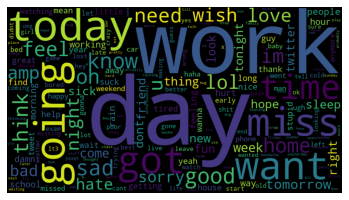

In [117]:
wc=WordCloud(width=900,height=500).generate(x)
plt.imshow(wc)
plt.axis('off')
plt.show()

# Machine learning models for text classification

In [118]:
dfr.shape

(7000, 13)

In [121]:
dfr.head()

,tweets,sentiment,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,people soo mean mean gonna talk dont look obvious,0,20,91,3.550000,11,0,0,0,0,0,0,0
1,bed demi lovato,0,6,29,3.833333,1,0,0,0,0,0,0,0
2,robert pattinson hit car,0,7,50,6.142857,0,0,0,0,1,0,1,0
3,hurts bored,0,6,30,4.000000,2,0,0,0,0,0,0,0
4,aloliver happened facebook tonight hate spoile...,0,12,83,5.666667,4,1,1,0,1,0,0,0


In [122]:
dfr_feat=dfr.drop(columns=['tweets','sentiment'],axis=1)
dfr_feat

,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,20,91,3.550000,11,0,0,0,0,0,0,0
1,6,29,3.833333,1,0,0,0,0,0,0,0
2,7,50,6.142857,0,0,0,0,1,0,1,0
3,6,30,4.000000,2,0,0,0,0,0,0,0
4,12,83,5.666667,4,1,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6995,20,105,4.250000,8,0,1,0,0,0,0,0
6996,19,92,3.842105,6,0,1,2,0,0,0,0
6997,11,71,5.454545,2,0,0,0,1,0,0,0
6998,12,64,4.333333,5,0,1,0,0,0,0,0


In [123]:
y=dfr['sentiment']
y

0       0
1       0
2       0
3       0
4       0
       ..
6995    4
6996    4
6997    4
6998    4
6999    4
Name: sentiment, Length: 7000, dtype: int64

# Using Bag of Words(BOW)

In [125]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
text_counts=cv.fit_transform(dfr['tweets'])
text_counts

<7000x14654 sparse matrix of type '<class 'numpy.int64'>'
	with 40811 stored elements in Compressed Sparse Row format>

In [126]:
text_counts.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [127]:
dfr_bow=pd.DataFrame(text_counts.toarray(),columns=cv.get_feature_names())
dfr_bow

,0000001,03,06,09,0f,0riginalh,10,100,1000,10001000,...,zune,zurahs,zwinky,zyrtec,zzzooohhh,zzzs,zzzz,zzzzz,zzzzzs,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [143]:
dfr['sentiment'].value_counts()

0    3500
4    3500
Name: sentiment, dtype: int64

In [148]:
Y=y.copy()

In [150]:
y=y.map({0:0,4:1})
y

0       0
1       0
2       0
3       0
4       0
       ..
6995    1
6996    1
6997    1
6998    1
6999    1
Name: sentiment, Length: 7000, dtype: int64

In [151]:
y.value_counts()

0    3500
1    3500
Name: sentiment, dtype: int64

In [138]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score,classification_report

In [133]:
sgd=SGDClassifier()
lr=LogisticRegression()
lrCV=LogisticRegressionCV()
svc=LinearSVC()
rfg=RandomForestClassifier()
bc=BaggingClassifier()
abc=AdaBoostClassifier()
gbm=GradientBoostingClassifier()
xgb=XGBClassifier()
lgm=LGBMClassifier()
cat=CatBoostClassifier()

In [134]:
clf={'SGD':sgd,'LR':lr,'LRCV':lrCV,'SVC':svc,'RFG':rfg,'BC':bc,'ABC':abc,'GBM':gbm,'XGB':xgb,'LGM':lgm,'CAT':cat}

In [137]:
clf.keys()

dict_keys(['SGD', 'LR', 'LRCV', 'SVC', 'RFG', 'BC', 'ABC', 'GBM', 'XGB', 'LGM', 'CAT'])

In [141]:
def classify(x,y):
    
    scaler=MinMaxScaler(feature_range=(0,1))
    x=scaler.fit_transform(x)
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
    
    for key in clf.keys():
        clf[key].fit(x_train,y_train)
        
        y_pred=clf[key].predict(x_test)
        score=accuracy_score(y_test,y_pred)
        
        print(key,'------>',score)
    

In [152]:
classify(dfr_bow,y)

SGD ------> 0.6462857142857142
LR ------> 0.6662857142857143
LRCV ------> 0.6668571428571428
SVC ------> 0.6434285714285715
RFG ------> 0.66
BC ------> 0.6617142857142857
ABC ------> 0.6085714285714285
GBM ------> 0.6417142857142857
XGB ------> 0.6645714285714286
LGM ------> 0.6171428571428571
Learning rate set to 0.020914
0:	learn: 0.6923316	total: 86.7ms	remaining: 1m 26s
1:	learn: 0.6913978	total: 115ms	remaining: 57.6s
2:	learn: 0.6908500	total: 143ms	remaining: 47.6s
3:	learn: 0.6897879	total: 171ms	remaining: 42.5s
4:	learn: 0.6890735	total: 198ms	remaining: 39.4s
5:	learn: 0.6883676	total: 226ms	remaining: 37.4s
6:	learn: 0.6877639	total: 254ms	remaining: 36s
7:	learn: 0.6871705	total: 281ms	remaining: 34.9s
8:	learn: 0.6865070	total: 311ms	remaining: 34.2s
9:	learn: 0.6857303	total: 338ms	remaining: 33.4s
10:	learn: 0.6850542	total: 365ms	remaining: 32.8s
11:	learn: 0.6842312	total: 394ms	remaining: 32.4s
12:	learn: 0.6836956	total: 421ms	remaining: 32s
13:	learn: 0.6831522	tot

# Manual Feature

In [153]:
dfr_feat.head()

,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,rt_count
0,20,91,3.550000,11,0,0,0,0,0,0,0
1,6,29,3.833333,1,0,0,0,0,0,0,0
2,7,50,6.142857,0,0,0,0,1,0,1,0
3,6,30,4.000000,2,0,0,0,0,0,0,0
4,12,83,5.666667,4,1,1,0,1,0,0,0


In [154]:
%%time
classify(dfr_feat,y)

SGD ------> 0.5942857142857143
LR ------> 0.5965714285714285
LRCV ------> 0.5971428571428572
SVC ------> 0.5925714285714285
RFG ------> 0.5525714285714286
BC ------> 0.5445714285714286
ABC ------> 0.608
GBM ------> 0.6005714285714285
XGB ------> 0.5822857142857143
LGM ------> 0.5805714285714285
Learning rate set to 0.020914
0:	learn: 0.6921982	total: 2.8ms	remaining: 2.79s
1:	learn: 0.6913317	total: 5.14ms	remaining: 2.56s
2:	learn: 0.6903941	total: 7.48ms	remaining: 2.49s
3:	learn: 0.6894849	total: 9.4ms	remaining: 2.34s
4:	learn: 0.6887303	total: 11.4ms	remaining: 2.28s
5:	learn: 0.6879325	total: 13.7ms	remaining: 2.27s
6:	learn: 0.6869628	total: 15.9ms	remaining: 2.26s
7:	learn: 0.6861191	total: 18.3ms	remaining: 2.27s
8:	learn: 0.6852728	total: 20.6ms	remaining: 2.27s
9:	learn: 0.6844497	total: 22.9ms	remaining: 2.26s
10:	learn: 0.6836424	total: 25ms	remaining: 2.25s
11:	learn: 0.6828367	total: 27.3ms	remaining: 2.25s
12:	learn: 0.6820789	total: 29.8ms	remaining: 2.26s
13:	learn: 0

# Manual+BOW

In [155]:
x=dfr_feat.join(dfr_bow)
x

,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,...,zune,zurahs,zwinky,zyrtec,zzzooohhh,zzzs,zzzz,zzzzz,zzzzzs,zzzzzzzz
0,20,91,3.550000,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,29,3.833333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,50,6.142857,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,30,4.000000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,83,5.666667,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,20,105,4.250000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,19,92,3.842105,6,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,11,71,5.454545,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,12,64,4.333333,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [156]:
%%time
classify(x,y)

SGD ------> 0.6611428571428571
LR ------> 0.6971428571428572
LRCV ------> 0.712
SVC ------> 0.6742857142857143
RFG ------> 0.668
BC ------> 0.6348571428571429
ABC ------> 0.652
GBM ------> 0.66
XGB ------> 0.688
LGM ------> 0.6765714285714286
Learning rate set to 0.020914
0:	learn: 0.6921290	total: 42.7ms	remaining: 42.7s
1:	learn: 0.6905583	total: 80.3ms	remaining: 40.1s
2:	learn: 0.6895128	total: 118ms	remaining: 39.3s
3:	learn: 0.6880657	total: 156ms	remaining: 38.9s
4:	learn: 0.6870399	total: 193ms	remaining: 38.5s
5:	learn: 0.6858461	total: 231ms	remaining: 38.2s
6:	learn: 0.6847543	total: 270ms	remaining: 38.3s
7:	learn: 0.6839844	total: 308ms	remaining: 38.2s
8:	learn: 0.6828732	total: 346ms	remaining: 38.1s
9:	learn: 0.6820750	total: 384ms	remaining: 38.1s
10:	learn: 0.6812928	total: 421ms	remaining: 37.9s
11:	learn: 0.6807796	total: 458ms	remaining: 37.7s
12:	learn: 0.6799210	total: 497ms	remaining: 37.7s
13:	learn: 0.6789821	total: 533ms	remaining: 37.5s
14:	learn: 0.6781734	

# Using TFIDF

In [162]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
dfr_tfidf=tfidf.fit_transform(dfr['tweets'])
dfr_tfidf=dfr_tfidf.toarray()
dfr_tfidf

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [163]:
dfr_tfidf=pd.DataFrame(x,columns=tfidf.get_feature_names())
dfr_tfidf

,0000001,03,06,09,0f,0riginalh,10,100,1000,10001000,...,zune,zurahs,zwinky,zyrtec,zzzooohhh,zzzs,zzzz,zzzzz,zzzzzs,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [164]:
%%time
classify(dfr_tfidf,y)

SGD ------> 0.668
LR ------> 0.6857142857142857
LRCV ------> 0.6822857142857143
SVC ------> 0.6634285714285715
RFG ------> 0.6731428571428572
BC ------> 0.66
ABC ------> 0.6125714285714285
GBM ------> 0.656
XGB ------> 0.6777142857142857
LGM ------> 0.628
Learning rate set to 0.020914
0:	learn: 0.6921095	total: 44.6ms	remaining: 44.6s
1:	learn: 0.6913612	total: 82.3ms	remaining: 41.1s
2:	learn: 0.6905528	total: 119ms	remaining: 39.6s
3:	learn: 0.6899830	total: 156ms	remaining: 38.8s
4:	learn: 0.6890595	total: 193ms	remaining: 38.3s
5:	learn: 0.6884436	total: 229ms	remaining: 38s
6:	learn: 0.6876959	total: 268ms	remaining: 38s
7:	learn: 0.6871644	total: 305ms	remaining: 37.8s
8:	learn: 0.6862425	total: 342ms	remaining: 37.6s
9:	learn: 0.6857582	total: 378ms	remaining: 37.4s
10:	learn: 0.6849386	total: 415ms	remaining: 37.3s
11:	learn: 0.6843692	total: 451ms	remaining: 37.1s
12:	learn: 0.6839108	total: 489ms	remaining: 37.1s
13:	learn: 0.6832277	total: 526ms	remaining: 37.1s
14:	learn: 0

# Manual+TFIDF

In [165]:
x=dfr_feat.join(dfr_tfidf)
x

,word_counts,chars_count,avg_word,stop_words_count,hash_counts,mentions_count,numeric_count,upper_count,emails_count,urls_flag,...,zune,zurahs,zwinky,zyrtec,zzzooohhh,zzzs,zzzz,zzzzz,zzzzzs,zzzzzzzz
0,20,91,3.550000,11,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,29,3.833333,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,50,6.142857,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,6,30,4.000000,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,12,83,5.666667,4,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6995,20,105,4.250000,8,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6996,19,92,3.842105,6,0,1,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6997,11,71,5.454545,2,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6998,12,64,4.333333,5,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
%%time
classify(x,y)

SGD ------> 0.6525714285714286
LR ------> 0.6828571428571428
LRCV ------> 0.6902857142857143
SVC ------> 0.6668571428571428
RFG ------> 0.6657142857142857
BC ------> 0.6222857142857143
ABC ------> 0.6257142857142857
GBM ------> 0.6314285714285715
XGB ------> 0.6605714285714286
LGM ------> 0.6525714285714286
Learning rate set to 0.020914
0:	learn: 0.6918468	total: 44.2ms	remaining: 44.2s
1:	learn: 0.6901064	total: 83.8ms	remaining: 41.8s
2:	learn: 0.6891198	total: 123ms	remaining: 40.9s
3:	learn: 0.6878234	total: 161ms	remaining: 40.1s
4:	learn: 0.6868568	total: 200ms	remaining: 39.9s
5:	learn: 0.6854463	total: 240ms	remaining: 39.7s
6:	learn: 0.6840932	total: 279ms	remaining: 39.5s
7:	learn: 0.6832112	total: 317ms	remaining: 39.3s
8:	learn: 0.6823287	total: 358ms	remaining: 39.5s
9:	learn: 0.6815610	total: 397ms	remaining: 39.3s
10:	learn: 0.6804801	total: 435ms	remaining: 39.1s
11:	learn: 0.6795590	total: 473ms	remaining: 38.9s
12:	learn: 0.6787776	total: 514ms	remaining: 39s
13:	lear